This first exploratory data analysis asset of the dataset explores the 2020 Stack Overflow Survey Results and focuses on gender. The main question is whether people over the age 35 or over make significantly more money than people under the age of 35 when full-time employed people are considered.

In [1]:
import pandas as pd

Import the 2020 Stack Overflow Survey Results

In [2]:
results = pd.read_csv('survey_results_public.csv')

For those who are employed full-time, what are the counts of people 35 and over vs. under 35?

In [3]:
employed = results.loc[results['Employment'] == 'Employed full-time']
age = employed.groupby("Age").size()
age = pd.DataFrame(age, columns = ['Count'])
age = age.reset_index()

In [7]:
under35 = age.loc[age['Age'] < 35, 'Count'].sum()

In [8]:
over35 = age.loc[age['Age'] >= 35, 'Count'].sum()

Condsidering people who are employed full-time, how much do people 35 and over make on average as compared to people below 35?

In [12]:
employed = results.loc[results['Employment'] == 'Employed full-time']
ages = employed.groupby("Age").sum()
ages = ages.reset_index()

In [15]:
comp_under35 = ages.loc[ages['Age'] < 35, 'ConvertedComp'].sum()

In [21]:
avg_under35 = comp_under35/under35

In [18]:
comp_over35 = ages.loc[ages['Age'] >= 35, 'ConvertedComp'].sum()

In [20]:
avg_over35 = comp_over35/over35

In [28]:
row = ('35 and over', 'Under 35')
column = 'AverageComp'

In [36]:
data = [['35 and over', avg_over35], ['Under 35', avg_under35]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Age Range', 'AvgComp']) 
df

,Age Range,AvgComp
0,35 and over,113780.834428
1,Under 35,77484.574473


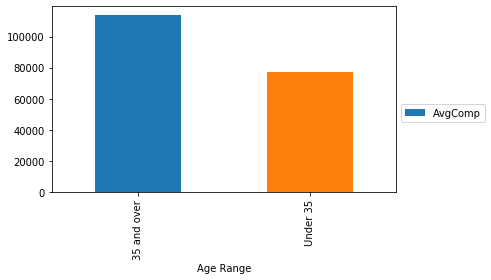

In [35]:
import matplotlib.pyplot as plt

comp_plot = df.plot.bar(x = 'Age Range', y = 'AvgComp')
box = comp_plot.get_position()
comp_plot.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#put the legend outside the plot area
lgd = comp_plot.legend(bbox_to_anchor = (1, .5), fontsize = 'medium')
plt.tight_layout()
plt.savefig('employed_comp_gender.png', bbox_inches = 'tight', dpi = 100)

Do employed men make significantly more money than employed women on average?

In [38]:
from scipy import stats
over35 = employed[employed['Age']>=35]
under35 = employed[employed['Age']<35]

In [39]:
over35 = list(over35['ConvertedComp'].dropna())
under35 = list(under35['ConvertedComp'].dropna())

In [40]:
stats.ttest_ind(over35,under35)

Ttest_indResult(statistic=14.46454108044658, pvalue=3.050028034156452e-47)

Based on these results, people 35 and over make significantly more money on average than people under 35. 